[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guiwitz/DSL_CV2_PyTorch/blob/main/notebooks/03-Basics_Training.ipynb)

# Basics of Training

Before we move to the case of using models with images, let's see on a very simple model how we can proceed with training. For this we use the simplest case: fitting a line to noisy points. Our data that we are making up are the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
torch.manual_seed(40);

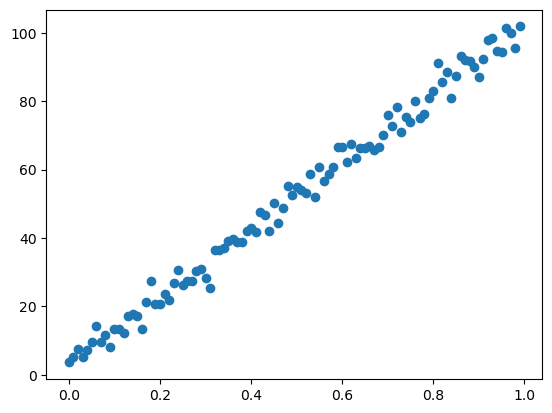

In [2]:
x_val = torch.arange(0,1,0.01)
y_val = 3 + 100 * x_val + 3*torch.tensor(np.random.randn(len(x_val)), dtype=torch.float32)

plt.plot(x_val, y_val, 'o');

In order to fit such as line, we need just two parameters: slope and intercept. So we need a linear layer with a single input as we have the bias for intercept. We use a simple ```Sequential``` model here:

In [3]:
lin_layer = nn.Linear(in_features=1, out_features=1)

model = nn.Sequential(lin_layer)

Our model is initialized randomly, so if we want to use it to predict values we will get a random line:

In [4]:
out = model(torch.arange(0,1,0.01, dtype=torch.float32)[:, None])

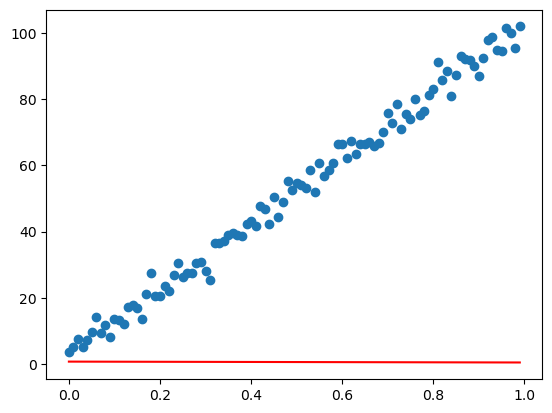

In [5]:
plt.plot(x_val, y_val, 'o');
plt.plot(np.arange(0,1,0.01), out.flatten().detach(), 'r-');

## Measuring the error

Deep Learning training works by trying to iteratively optimize the weights of the model so that it predicts accurately the training data. For this the model needs to quantify the error. For a simple linear fit like here, a natural choice is the Mean Square Error (MSE), or the summed square distance of each point from the model.

This MSE value is called the **loss** and many functions are available for such losses in PyTorch. In this is it is:

In [6]:
criterion = nn.MSELoss()

It takes as input the predicted and actual values:

In [7]:
predicted = model(x_val[:, None])

In [8]:
loss = criterion(y_val, predicted.ravel())
loss

tensor(3477.2107, grad_fn=<MseLossBackward0>)

## Optimizing

Next, the model needs to update its weights so that at the next iteration the loss will be smaller. A common choice for this optimization is gradient descent: the model will probe weights around its current values and chose to move the values in the direction leading to the largest decrease in loss. Optimizers are also available as simple objects in PyTorch. They need to know the model parameters plus additional options specific to each optimizer such as the learning rate:

In [9]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

Before the optimizer can actually take a step in the correct direction, we need to compute that direction. This is done by "backpropagating" the loss, i.e. checking how the loss depends on each weight in our model (currently just one):

In [10]:
loss.backward()

Finally we do one optimization round:

In [11]:
optimizer.step()

If we compute again the loss, it should have decreased:

In [12]:
predicted = model(x_val[:, None])
loss = criterion(y_val, predicted.ravel())
loss

tensor(3327.7822, grad_fn=<MseLossBackward0>)

Finally we reset the optimizer so that it doesn't accumulate information from previous steps:

In [13]:
optimizer.zero_grad()

## Training loop

Obviously we don't want to repeat the operations above manually thousands of times. So we summarize them in a loop of the following steps:
- compute outputs with current model
- compute the loss (error)
- "look around" the current solution to improve it (backwards)
- do one step of optimization (step)

In [14]:
if 'model' in locals():
    del model
lin_layer = nn.Linear(in_features=1, out_features=1)
model = nn.Sequential(nn.Linear(in_features=1, out_features=1))
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
for j in range(2000):
        
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_val[:, np.newaxis])
    loss = criterion(outputs, y_val[:, np.newaxis])
    loss.backward()
    optimizer.step()
    if j%100 == 0:
        print(loss)

tensor(3488.1001, grad_fn=<MseLossBackward0>)
tensor(397.9834, grad_fn=<MseLossBackward0>)
tensor(293.8072, grad_fn=<MseLossBackward0>)
tensor(227.4544, grad_fn=<MseLossBackward0>)
tensor(176.5900, grad_fn=<MseLossBackward0>)
tensor(137.5359, grad_fn=<MseLossBackward0>)
tensor(107.5496, grad_fn=<MseLossBackward0>)
tensor(84.5257, grad_fn=<MseLossBackward0>)
tensor(66.8478, grad_fn=<MseLossBackward0>)
tensor(53.2744, grad_fn=<MseLossBackward0>)
tensor(42.8525, grad_fn=<MseLossBackward0>)
tensor(34.8505, grad_fn=<MseLossBackward0>)
tensor(28.7065, grad_fn=<MseLossBackward0>)
tensor(23.9890, grad_fn=<MseLossBackward0>)
tensor(20.3669, grad_fn=<MseLossBackward0>)
tensor(17.5857, grad_fn=<MseLossBackward0>)
tensor(15.4503, grad_fn=<MseLossBackward0>)
tensor(13.8107, grad_fn=<MseLossBackward0>)
tensor(12.5517, grad_fn=<MseLossBackward0>)
tensor(11.5851, grad_fn=<MseLossBackward0>)


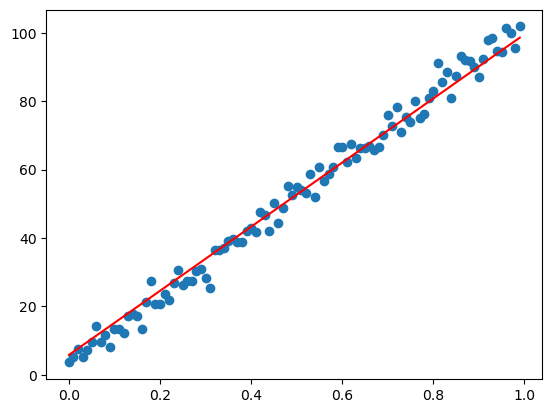

In [16]:
plt.plot(x_val, y_val, 'o');
plt.plot(x_val, outputs.flatten().detach(), 'r-');

## Exercise

Copy the training loop above. Add an activation layer after the first linear layer and another linear layer with size 64 to the model to be able to fit the data below:

In [17]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x_val = torch.rand(100)
y_val = torch.cos(x_val*10) + 0.1*torch.tensor(np.random.randn(len(x_val)), dtype=torch.float32)

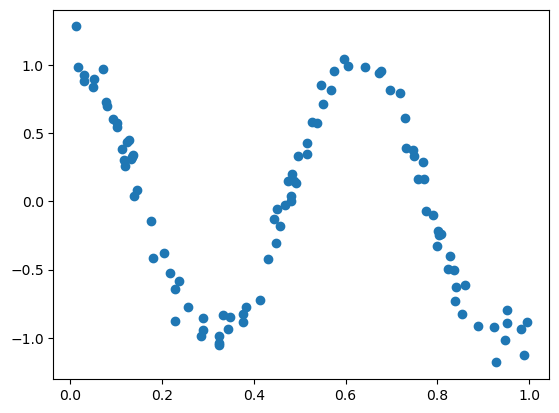

In [18]:
plt.plot(x_val, y_val,'o');